Problem statement: find a location to purchase a cost effective  HDB hous for a family with a kid who is going to attend prim school

discorvering factors affect the decision:
1. School ranking 
2. Cost psf ranking

results looking for:
find a most cost effective HDB with near to the high ranking school and cost relatively cheap for a fmaily with one kid at Prim Sch age

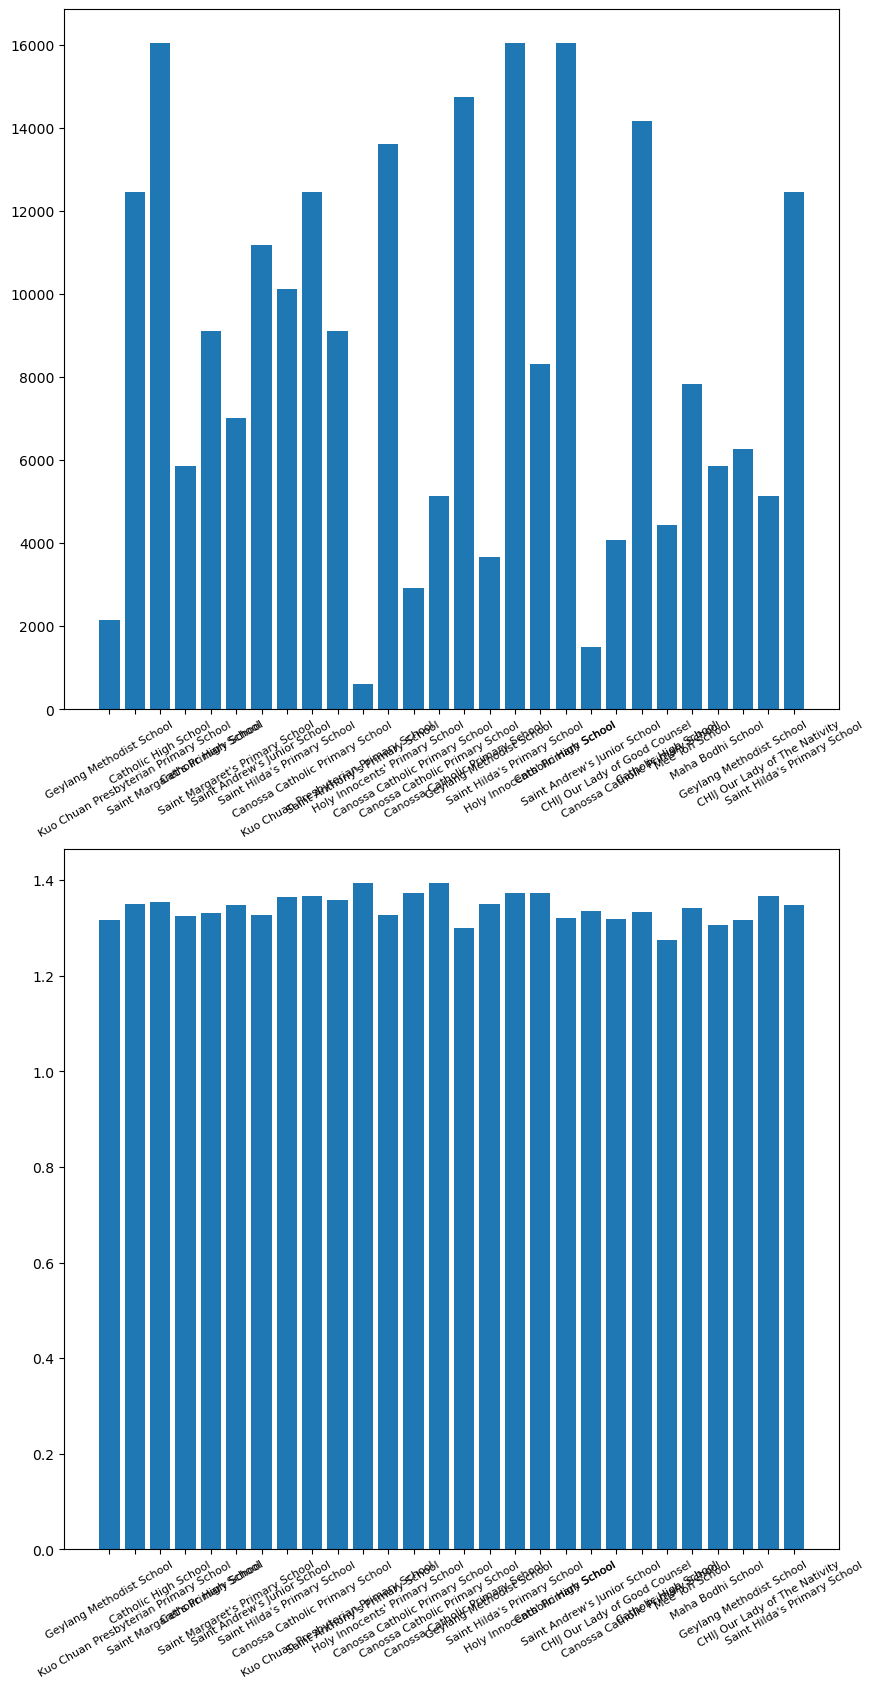

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, atan, sqrt
# Load data from a CSV file
file_path = 'datasets/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

#[jason] looking at the school ranking, pending Hugo to put the data
#[jason] use affliation to determine the school ranking

sdata=data[data['pri_sch_affiliation']==True]
sdata['pri_sch_affiliation']
sdata['vacancy_rank']=sdata['vacancy'].rank(ascending=False)
dlon = sdata['pri_sch_latitude'] - sdata['Latitude']
dlat = sdata['pri_sch_longitude'] - sdata['Longitude']
a = (np.sin(dlat/2))**2 + np.cos(sdata['pri_sch_latitude']) * np.cos(sdata['Latitude']) * (np.sin(dlon/2))**2
c = 2 * np.cos(np.sqrt(a))/np.sin(np.sqrt(1-a))
R = 1.0
sdata['pri_sch_dist']= R * c

sdata.fillna(0)

fig, ax=plt.subplots(2,1,figsize=(10,20))

ax[0].bar(sdata['pri_sch_name'],sdata['vacancy_rank'])
ax[0].set_xticklabels(sdata['pri_sch_name'], rotation=30, fontsize=8)
ax[1].bar(sdata['pri_sch_name'],sdata['pri_sch_latitude'])
ax[1].set_xticklabels(sdata['pri_sch_name'], rotation=30, fontsize=8)